In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2020.deeplearning/master/init.py
from init import init; init(force_download=False)

In [2]:
import tensorflow as tf
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle, bz2
from local.lib import mlutils
%matplotlib inline

## Check the following article on network architectures

- https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d

In particular, 

- GlobalAveragePooling
- 1x1 convolutions
- Skip connections
- Networks modules:
    - **Inception**: multiple filter sizes on the same level (see [here](https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202))
    - **Resnet**: learns residuals, gradients back propagate larger to earlier layers (see [here](https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec))
    - **Xception**: depthwise separable convolutions (see [here](https://medium.com/@zurister/depth-wise-convolution-and-depth-wise-separable-convolution-37346565d4ec))
    

# Task: Use a Tensorflow hub model for image feature vector extraction

- browse this page, https://www.tensorflow.org/hub/common_signatures/images#image_feature_vector
- select a TF2.0 model that provides feature vector
- load and resize the mini-cifar2 dataset to the image size required by the selected model (see [`skimage.transform.resize`](https://scikit-image.org/docs/dev/api/skimage.transform.html?ref=driverlayer.com/web#skimage.transform.resize))
- apply the selected model layer to the resized mini-cifar2 dataset
- use any classical method from `scikit-learn` to create a classifier

In [1]:
!wget -nc https://s3.amazonaws.com/rlx/mini_cifar_2.h5

File ‘mini_cifar_2.h5’ already there; not retrieving.



(0.0, 1.0)

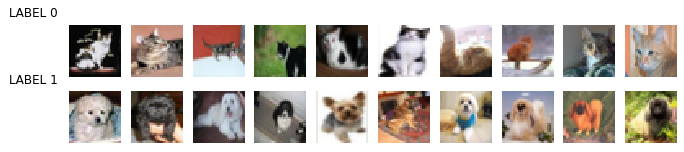

In [3]:
import h5py
with h5py.File('mini_cifar_2.h5','r') as h5f:
    x_cifar = h5f["x"][:][:1000]
    y_cifar = h5f["y"][:][:1000]
    
x_cifar = x_cifar[y_cifar!=2]    
y_cifar = y_cifar[y_cifar!=2]    
mlutils.show_labeled_image_mosaic(x_cifar, y_cifar)
np.min(x_cifar), np.max(x_cifar)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_cifar, y_cifar, test_size=.2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print("\ndistribution of train classes")
print(pd.Series(y_train).value_counts())
print("\ndistribution of test classes")
print(pd.Series(y_test).value_counts())

(800, 32, 32, 3) (800,) (200, 32, 32, 3) (200,)

distribution of train classes
0    405
1    395
dtype: int64

distribution of test classes
1    102
0     98
dtype: int64


## Observe how we can apply a model to input data

- this example shows an untrained model
- you will have to do similarly with tfhub models

In [40]:
m = tf.keras.Sequential()
m.add(tf.keras.layers.InputLayer((32,32,3)))
m.add(tf.keras.layers.Flatten())
m.add(tf.keras.layers.Dense(20, activation="sigmoid"))


In [44]:
output = m(x_train.astype(np.float32)).numpy()
output.shape

(800, 20)

In [45]:
output

array([[0.3972349 , 0.66645443, 0.18156438, ..., 0.5995513 , 0.5059872 ,
        0.6309914 ],
       [0.5263773 , 0.63352937, 0.17359908, ..., 0.5802545 , 0.59387153,
        0.5766669 ],
       [0.5249352 , 0.62075984, 0.12628277, ..., 0.54260933, 0.60192597,
        0.52984977],
       ...,
       [0.27514037, 0.72804517, 0.2200535 , ..., 0.67471415, 0.43245482,
        0.5527509 ],
       [0.39006898, 0.5611647 , 0.0873332 , ..., 0.63478905, 0.6836297 ,
        0.5801293 ],
       [0.50599426, 0.32091853, 0.05747661, ..., 0.5760915 , 0.8209604 ,
        0.5349425 ]], dtype=float32)

## Your solution here

In [12]:
import tensorflow_hub as hub
from skimage.transform import resize
